LIMPIEZA DE DATOS
--------------------

In [23]:
import pandas as pd

In [24]:
#Carga de datos
df_viviendas = pd.read_json('./../../DATA/viviendas_madrid_.json')
df_viviendas.head()

,title,price,location,rooms,surface,bathrooms,Aire acondicionado:,Tipo de inmueble:,Año de construcción:,Planta:,Año reforma edificio:,Calefacción:,Jardín:,Ascensor:
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,None,None
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,None,None
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,Privado,None
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),None,None
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),None,None


In [25]:
#Se eliminan los datos de las cocheras y locales, ya que buscamos viviendas
df_no_viviendas = df_viviendas[df_viviendas['title'].str.startswith('Box') |
                               df_viviendas['title'].str.startswith('Local')]
indices_a_eliminar = df_no_viviendas.index
df_viviendas.drop(indices_a_eliminar, inplace = True)

In [26]:
#Renombrar columnas o campos del DataFrame
nombres_columnas = {'Aire acondicionado:': 'air conditioning',
                    'Tipo de inmueble:' : 'property type',
                    'Año de construcción:': 'year built',
                    'Planta:' : 'floor',
                    'Año reforma edificio:': 'building reform',
                    'Calefacción:' : 'heating',
                    'Jardín:' : 'garden',
                    'Ascensor:' : 'lift'}

df_viviendas = df_viviendas.rename(columns = nombres_columnas)
df_viviendas.head()

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,None,None
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,None,None
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,Privado,None
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),None,None
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),None,None


In [27]:
#Obtener información de cada campo del DataFrame
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 1933
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1562 non-null   object 
 1   price             1562 non-null   int64  
 2   location          1562 non-null   object 
 3   rooms             1485 non-null   float64
 4   surface           1562 non-null   int64  
 5   bathrooms         1416 non-null   float64
 6   air conditioning  546 non-null    object 
 7   property type     1561 non-null   object 
 8   year built        1419 non-null   float64
 9   floor             946 non-null    object 
 10  building reform   59 non-null     float64
 11  heating           879 non-null    object 
 12  garden            46 non-null     object 
 13  lift              496 non-null    object 
dtypes: float64(4), int64(2), object(8)
memory usage: 183.0+ KB


In [28]:
"""
Se eliminan los datos de las viviendas que no presentan datos sobre los baños, habitaciones,
tipo de propiedad y año de construcción
"""
df_viviendas = df_viviendas.dropna(subset=['bathrooms', 'rooms', 'property type', 'year built'])

A continuación, veremos la distribución de los campos de tipo objeto
---------
--------------------------------------------------------------------------

In [29]:
df_viviendas['heating'].value_counts()

Independiente (Gas)                                              325
Independiente                                                     86
Independiente (Eléctrica)                                         69
centralizada (Gas)                                                65
centralizada                                                      54
Independiente (Radiadores)                                        27
centralizada (A Gasoil)                                           22
Independiente (Gas, Radiadores)                                   11
Independiente (A Gasoil)                                          10
centralizada (Radiadores)                                          6
Independiente (Fan Coil)                                           4
Independiente (Chimenea, Gas)                                      3
centralizada (Gas, Radiadores)                                     3
centralizada (Eléctrica)                                           3
centralizada (Chimenea)           

In [30]:
df_viviendas['air conditioning'].value_counts()

Independiente (Frío / Calor)              206
Independiente                             101
Independiente (A Techo)                    21
Centralizada (Frío / Calor)                18
Independiente (Frío / Calor, A Techo)      15
Centralizada                               11
Independiente (Fan Coil)                    4
Centralizada (Frío / Calor, A Techo)        4
Independiente (Predisposición)              2
Independiente (Frío / Calor, Fan Coil)      2
Centralizada (A Techo)                      1
Name: air conditioning, dtype: int64

In [31]:
df_viviendas['property type'].value_counts()

Popular     648
Media       407
Señorial    158
De época     30
Name: property type, dtype: int64

In [32]:
df_viviendas['garden'].value_counts()

Privado    37
Name: garden, dtype: int64

In [33]:
df_viviendas['garden'] = df_viviendas['garden'].notna().astype(int)
df_viviendas['garden'].fillna(0, inplace = True)

In [34]:
df_viviendas['lift'].value_counts()

Sí    338
Name: lift, dtype: int64

In [35]:
df_viviendas['lift'] = df_viviendas['lift'].notna().astype(int)
df_viviendas['lift'].fillna(0, inplace = True)

In [36]:
df_viviendas['floor'].value_counts()

1                        101
Baja                      84
2                         77
3                         66
Media                     58
4                         38
2 (planta media)          30
1 (planta media)          29
3 (planta media)          26
Alta                      23
4 (planta alta)           18
5                         16
3 (planta alta)           14
1 (planta baja)           12
5 (planta alta)           12
6                         12
Planta baja               11
4 (planta media)           8
6 (planta alta)            8
5 (planta media)           7
7 (planta alta)            6
7                          6
9                          6
Ático                      5
9 (planta alta)            4
8                          4
3 (planta ático)           3
2 (planta alta)            3
3 (planta baja)            3
2 (planta baja)            3
12                         2
8 (planta alta)            2
1 (planta alta)            2
6 (planta ático)           2
14            

In [37]:
df_viviendas['location'].value_counts()

Madrid                                               47
Loeches                                              30
Parla                                                30
Lavapiés - Embajadores, Madrid                       26
Torrejón De Ardoz                                    25
                                                     ..
Arganzuela, Acacias - Legazpi, Madrid                 1
Carabanchel, Marque De Vadillo - Comillas, Madrid     1
Pezuela De Las Torres                                 1
San Isidro, Getafe                                    1
Tetuán, Berruguete, Madrid                            1
Name: location, Length: 195, dtype: int64

In [44]:
#Se eliminan las viviendas que son pisos de los cuales no tenemos referencia de la planta en la que se encuentran
df_viviendas = df_viviendas[~(df_viviendas['title'].str.startswith('Piso') & (df_viviendas['floor'].isna()))]
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,None,NaN,None,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,None,NaN,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,None,Señorial,1975.0,5,NaN,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,None,Señorial,1975.0,3,NaN,None,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,None,Media,2019.0,Media,NaN,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,None,Media,1977.0,None,NaN,centralizada (A Gasoil),0,0


In [45]:
#Las viviendas que no tienen referencia sobre la planta en la que se encuentran son casas, y le ponemos planta 0
df_viviendas['floor'].fillna(0, inplace = True)
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,0,NaN,None,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,None,Popular,1968.0,2,2023.0,None,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,0,NaN,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,NaN,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,None,Popular,1974.0,3,NaN,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,None,Señorial,1975.0,5,NaN,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,None,Señorial,1975.0,3,NaN,None,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,None,Media,2019.0,Media,NaN,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,None,Media,1977.0,0,NaN,centralizada (A Gasoil),0,0


In [46]:
#Generalizamos la distribución de las viviendas
df_viviendas['floor'] = df_viviendas['floor'].str.extract('(\d+|[Bb]aja|[Mm]edia|[Aa]lta|[Áá]tico|[Ss]emisótano|[Bb]uhardilla)')


In [47]:
df_viviendas['floor'].value_counts()

1             145
2             113
3             112
Baja           84
4              64
Media          58
5              36
Alta           23
6              22
7              13
baja           11
9              10
8               7
Ático           5
12              2
14              2
24              1
10              1
Buhardilla      1
Semisótano      1
Name: floor, dtype: int64

In [48]:
#Transformamos el campo de reforma a 0 o 1 dependiendo de si ha sido reformado o no
df_viviendas['building reform'].fillna(0, inplace = True)
df_viviendas['building reform'] = df_viviendas['building reform'].notna().astype(int)

In [49]:
df_viviendas['floor'].fillna('House', inplace=True)
df_viviendas['heating'].fillna('No', inplace=True)
df_viviendas['air conditioning'].fillna('No', inplace=True)

In [50]:
df_viviendas

,title,price,location,rooms,surface,bathrooms,air conditioning,property type,year built,floor,building reform,heating,garden,lift
0,Casa en venta en Majadahonda,585000,Majadahonda,5.0,208,3.0,Independiente,Señorial,1986.0,House,1,No,0,0
1,Piso en venta en Villaverde,125000,"Villaverde Alto, Madrid",3.0,68,1.0,No,Popular,1968.0,2,1,No,0,0
2,Casa en venta en Rivas-Vaciamadrid,545000,Rivas-Vaciamadrid,4.0,252,2.0,Independiente,Popular,1998.0,House,1,Independiente,1,0
3,Piso en venta en Calle Dulcinea,107500,"Pryconsa - Juan De Austria - El Val, Pryconsa,...",3.0,58,1.0,Independiente (Frío / Calor),Media,1969.0,Baja,1,Independiente (Gas),0,0
4,Piso en venta en Reyes Catolicos - Rinconada -...,109900,"Rinconada, Alcalá De Henares",3.0,61,1.0,No,Popular,1974.0,3,1,Independiente (Gas),0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,Piso en venta en Chorrillo - Estación - Ensanche,193900,"Ensanche, Alcalá De Henares",4.0,110,2.0,No,Señorial,1975.0,5,1,centralizada (Radiadores),0,0
1889,Piso en venta en Chorrillo - Estación - Ensanche,175000,"Ensanche, Alcalá De Henares",3.0,86,2.0,No,Señorial,1975.0,3,1,No,0,0
1904,Piso en venta en Centro,1375900,"Malasaña - Justicia - Universidad, Madrid",2.0,118,2.0,No,Media,2019.0,Media,1,Independiente,0,1
1925,Casa en venta en Meco,190000,Meco,4.0,98,2.0,No,Media,1977.0,House,1,centralizada (A Gasoil),0,0


PREPARACIÓN DE LOS DATOS
------------------------

   
   ColumnTransformer Y Pipeline
------------------------

In [26]:
df_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 1926
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             844 non-null    object 
 1   price             844 non-null    int64  
 2   location          844 non-null    object 
 3   rooms             844 non-null    float64
 4   surface           844 non-null    int64  
 5   bathrooms         844 non-null    float64
 6   air conditioning  844 non-null    object 
 7   property type     844 non-null    object 
 8   year built        844 non-null    float64
 9   floor             844 non-null    object 
 10  building reform   844 non-null    int32  
 11  heating           844 non-null    object 
 12  garden            844 non-null    int32  
 13  lift              844 non-null    int32  
dtypes: float64(3), int32(3), int64(2), object(6)
memory usage: 89.0+ KB


In [51]:
#Definimos las listas numéricas y categóricas del DataFrame
numeric_list = ['surface', 'year built', 'building reform', 
                'garden', 'lift', 'rooms', 'bathrooms']

categorical_list = ['location', 'air conditioning', 'property type',
                    'floor', 'heating']

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [53]:
#Definimos los transformadores de ambos grupos:
numeric_transformer = Pipeline(steps = [( 'scaler', StandardScaler())]) 
categorical_transformer = Pipeline (steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [54]:
#Creamos el preprocesador
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_list),
        ('cat', categorical_transformer, categorical_list)
    ]
)

---------------------------------------------------------------------------------------------------------
PEPARACIÓN DE DATOS
------------------------
 - X: Datos sin la columna "price"
 - y: Datos con la columna "price"
 
Muestras de entrenamiento y prueba
 - X_train: grupo de entrenamiento
 - X_test: grupo de prueba
 - y_train: target para el grupo de entrenamiento
 - y_test: target para el grupo de prueba

In [55]:
#Crear X (Fuera la columna de 'price')
X = df_viviendas.drop('price', axis = 1)

In [56]:
#Crear y (Valor de la columna 'price')
y = df_viviendas['price']

In [57]:
#Dividir los datos para el entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
#Revisamos el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((675, 13), (169, 13), (675,), (169,))

 --------------------------------------
 - Probamos algunos modelos
 -----------------------------------

---------------------------------------------------------------------------------------------------------
LinearRegression
-----------

In [59]:
#Llamamos al modelo lineal
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [60]:
#Pipeline de la predicción completa
model_linear_regression = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('linear_regression', linear_regression)
    ]
)

In [61]:
#Entrenamos el modelo
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift', 'rooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('linear_regression', LinearRegression())])

In [62]:
#Realizamos las predicciones
predictions = model_linear_regression.predict(X_test)

In [63]:
#Vemos las predicciones
predictions

array([ 1.03156514e+05,  2.02102040e+05,  1.54341774e+05,  1.62295862e+05,
        2.92715637e+05,  7.28356711e+04,  1.20986218e+05,  1.30063681e+05,
        1.67107713e+05,  1.33763764e+05,  2.10203898e+05,  1.21459433e+05,
        1.96430374e+05,  2.44921198e+05,  2.24206174e+05,  2.26716480e+05,
        7.50878168e+04,  1.56380206e+05,  1.21536935e+05,  2.71404845e+05,
        2.54148495e+05,  1.24403317e+05,  1.78036661e+05,  3.13911467e+05,
        4.40272836e+05,  2.01524757e+05,  2.36983510e+05,  4.01121413e+05,
        1.35166651e+05,  4.40166721e+05,  6.08897407e+05,  2.62286868e+05,
        3.66564048e+05,  3.07144076e+05,  1.27008738e+05,  7.69482120e+05,
        7.03746687e+04,  2.15487339e+05,  2.00930720e+05,  2.84965684e+05,
        1.78931465e+05,  3.21756867e+05,  8.86625939e+04,  2.24411128e+05,
        2.06550889e+05,  2.87753220e+05,  3.60366093e+05,  4.13171520e+05,
        3.52453762e+05,  1.61286611e+05,  1.70016479e+05,  7.44872152e+05,
        3.88343111e+05,  

-------------------------------------------------------------------------------------------------------------------
CROSS VALIDATION
------------------------
La validación cruzada o cross validation (CV) es una de las técnicas utilizadas para probar la efectividad de los modelos de Machine Learning, también es un procedimiento de muestreo utilizado para evaluar un modelo si tenemos datos ilimitados.

Una manera de obtener las muestras es a través del método del k-fold, el cual divide a los datos en k muestras.

In [73]:
#Evaluamos el modelo usando crossvalidation
from sklearn.model_selection import cross_val_score

linear_scores = cross_val_score(
    model_linear_regression, X, y, scoring = 'neg_mean_squared_error', cv = 10
)
linear_scores

array([-9.51865939e+09, -2.79046245e+10, -8.27269917e+09, -5.85989078e+09,
       -8.00269158e+09, -8.96592885e+09, -1.71194287e+10, -9.51958081e+09,
       -1.96598802e+10, -1.14229347e+12])

In [74]:
#Cambiamos el signo y sacamos la raíz
import numpy as np
linear_rmse_scores = np.sqrt(-linear_scores)
linear_rmse_scores

array([  97563.61714177,  167046.77329692,   90954.37958792,
         76549.92348125,   89457.76423142,   94688.58878976,
        130841.23485081,   97568.33919239,  140213.69484539,
       1068781.30014781])

In [75]:
#Definimos una función que nos devuelva el score, mean y standard deviation

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [76]:
display_scores(linear_rmse_scores)

Scores: [  97563.61714177  167046.77329692   90954.37958792   76549.92348125
   89457.76423142   94688.58878976  130841.23485081   97568.33919239
  140213.69484539 1068781.30014781]
Mean: 205366.56155654177
Standard Deviation: 289026.4011298087


------------------------------------------------------------------------------------------------------------
DecisionTree
-----------------------

In [77]:
#Aplicar el modelo de árboles de decisión con DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#1. Nombrar una variable para nuestro modelo
tree_reg = DecisionTreeRegressor(random_state=42)

#2. Definir el Pipeline: Transformación + modelo
model_tree_reg = Pipeline (
    steps = [
        ('preprocessor', preprocessor),
        ('tree_reg', tree_reg)
    ]
)

#3. Ajustar el modelo
model_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift', 'rooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

In [78]:
#Evaluación
#4. Calcular el score con la validación cruzada CV = 10
tree_reg_scores = cross_val_score(
    model_tree_reg, X, y, scoring = 'neg_mean_squared_error', cv = 10
)

#5. Realizar el cambio de signo y sacar la raíz
tree_rmse_scores = np.sqrt(-tree_reg_scores)

#6. Mostrar el resultado usando la función display_scores
display_scores(tree_rmse_scores)

Scores: [166958.11797119 197867.62873794 128154.21332524  93360.62523399
 113072.41847732  95272.6435779  119688.80985622 129185.33907617
  94632.90363954 198481.52551383]
Mean: 133667.42254093481
Standard Deviation: 38370.99920745778


----------------------------------------------------------------------------------------------------------------
RandomForestRegressor
-------------------------------

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
#1. Nombrar una variable para nuestro modelo
forest_reg =RandomForestRegressor(n_estimators = 10, random_state=42)

#2. Definir el Pipeline de Transformación + modelo
model_forest_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('forest_reg', forest_reg)
    ]
)

#3. Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift', 'rooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [81]:
#Evaluación
#4. Calcular el score con la validación cruzada CV = 10
forest_reg_scores = cross_val_score(
    model_forest_reg, X, y, scoring = 'neg_mean_squared_error', cv = 10
)

#5. Realizar el cambio de signo y sacar la raíz
forest_rmse_scores = np.sqrt(-forest_reg_scores)

#6. Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores)

Scores: [116226.87999987 179887.65373809 112195.21958321  74031.39325821
  97871.14663756  95850.44263748 147330.80653033 105893.96788488
  77927.56592175 170636.2465914 ]
Mean: 117785.13227827707
Standard Deviation: 34754.42143869343


--------------------------------------------------------------------------------------------------------
Ridge
------------------------------------------------------------------

In [82]:
from sklearn.linear_model import Ridge

# 1. Nombrar una variable para nuestro modelo (Ridge Regression)
ridge_reg = Ridge(alpha=0.001, random_state=42)  

# 2. Definir el Pipeline de Transformación + modelo
model_ridge_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),  
        ('ridge_reg', ridge_reg)
    ]
)

# 3. Ajustar el modelo
model_ridge_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
ridge_reg_scores = cross_val_score(
    model_ridge_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
ridge_rmse_scores = np.sqrt(-ridge_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(ridge_rmse_scores)


Scores: [  97555.25329269  167080.56553601   90975.14231443   76570.55092334
   89372.81465007   94641.97131336  130848.10787837   97546.7814254
  140130.35827553 1069485.30933888]
Mean: 205420.68549480956
Standard Deviation: 289242.53441663226


---------------------------------------------------------------------------------------------------
PolynomialFeatures
---------------------------------------------------------------------------------------------------

In [83]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

# 1. Crear el modelo de regresión polinómica
degree = 2  # Grado del polinomio
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# 2. Definir el Pipeline de Transformación + modelo
model_poly_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('polyreg', polyreg)
    ]
)

# 3. Ajustar el modelo
model_poly_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
poly_reg_scores = cross_val_score(
    model_poly_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
poly_rmse_scores = np.sqrt(-poly_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(poly_rmse_scores)


Scores: [  389129.53927203   445615.53702351   154581.45197632   236690.23400562
   409739.64348708   515196.371679     375229.87145727   609397.70401498
   573419.96665123 94468209.01395477]
Mean: 9817720.933352182
Standard Deviation: 28217140.66148952


--------------------------------------------------------------------------------------------------------
SVR
----------------------

In [84]:
from sklearn.svm import SVR

# 1. Crear el modelo de Regresión de Máquinas de Vectores de Soporte (SVR)
svr_reg = SVR()

# 2. Definir el Pipeline de Transformación + modelo
model_svr_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('svr_reg', svr_reg)
    ]
)

# 3. Ajustar el modelo
model_svr_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
svr_reg_scores = cross_val_score(
    model_svr_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
svr_rmse_scores = np.sqrt(-svr_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(svr_rmse_scores)


Scores: [203804.83107695 251646.15058244 177482.99604439 115161.26068593
 176217.65571396 149493.09543749 239800.72207671 166422.06064877
 107388.87730046 218108.08693829]
Mean: 180552.57365053787
Standard Deviation: 46192.26180458341


----------------------------------------------------------------------------------------------------
GradientBoostingRegressor
----------------

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Crear el modelo de Regresión de Gradiente Descendente
gradient_reg = GradientBoostingRegressor(random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_gradient_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('gradient_reg', gradient_reg)
    ]
)

# 3. Ajustar el modelo
model_gradient_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
gradient_reg_scores = cross_val_score(
    model_gradient_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
gradient_rmse_scores = np.sqrt(-gradient_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(gradient_rmse_scores)


Scores: [144743.48262641 175175.9508963  102509.93061315  70948.33737024
  93291.98756429  85451.91356663 138598.20888911 130109.91733218
 111955.50563862 168737.85155735]
Mean: 122152.30860542736
Standard Deviation: 33342.695408651285


----------------------------------------------------------------------------------------------------------------
KNeighborsRegressor
-----------

In [86]:
from sklearn.neighbors import KNeighborsRegressor

# 1. Crear el modelo de Regresión de Vecinos Más Cercanos
knn_reg = KNeighborsRegressor()

# 2. Definir el Pipeline de Transformación + modelo
model_knn_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('knn_reg', knn_reg)
    ]
)

# 3. Ajustar el modelo
model_knn_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
knn_reg_scores = cross_val_score(
    model_knn_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
knn_rmse_scores = np.sqrt(-knn_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(knn_rmse_scores)


Scores: [167144.24898591 208686.84610684 122978.35565675  81281.72240934
 108868.87837282 106457.26269398 169757.15129521 125655.1165579
  91429.75246042 164258.23307454]
Mean: 134651.7567613706
Standard Deviation: 38780.517060702885


--------------------------------------------------------------------------------------------------------
MLPRegressor
----------

In [87]:
from sklearn.neural_network import MLPRegressor

# 1. Crear el modelo de Regresión de Redes Neuronales
nn_reg = MLPRegressor(random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_nn_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('nn_reg', nn_reg)
    ]
)

# 3. Ajustar el modelo
model_nn_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
nn_reg_scores = cross_val_score(
    model_nn_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
nn_rmse_scores = np.sqrt(-nn_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(nn_rmse_scores)


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\skle

Scores: [326732.04816451 351863.39612632 294689.28766874 246095.98870927
 305221.27001384 278740.68102065 346173.00184778 289592.55985647
 233558.80249028 343141.2990692 ]
Mean: 301580.8334967053
Standard Deviation: 39125.89377379382


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------------------------------------------------------------------------------
Lasso
-------

In [88]:
from sklearn.linear_model import Lasso

# 1. Crear el modelo de Regresión de Lasso
lasso_reg = Lasso(alpha=1.5, random_state=42)

# 2. Definir el Pipeline de Transformación + modelo
model_lasso_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('lasso_reg', lasso_reg)
    ]
)

# 3. Ajustar el modelo
model_lasso_reg.fit(X_train, y_train)

# Evaluación
# 4. Calcular el score con la validación cruzada CV = 10
lasso_reg_scores = cross_val_score(
    model_lasso_reg, X, y, scoring='neg_mean_squared_error', cv=10
)

# 5. Realizar el cambio de signo y sacar la raíz
lasso_rmse_scores = np.sqrt(-lasso_reg_scores)

# 6. Mostrar el resultado usando la función display_scores
display_scores(lasso_rmse_scores)


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177879999469.96582, tolerance: 2340526785.1775994
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140303712571.09863, tolerance: 2144512141.0291438
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7036297944.824219, tolerance: 2400214310.5880103
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model

Scores: [  93775.4382639   168065.44900262   94894.40891145   77829.35334232
   87749.1629622    91737.89651696  131342.92181433  102144.86061729
  138700.99006785 1072439.46613072]
Mean: 205867.99476296324
Standard Deviation: 290077.66864356364


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2591290201.283203, tolerance: 2308964639.467918
  model = cd_fast.sparse_enet_coordinate_descent(


-------------------------------------------------------------------------------------------------------
Comparamos todos los resultados obtenidos:
-------------

In [89]:
print('Lasso')
print(display_scores(lasso_rmse_scores))
print('----------------------------------------------')
print('KNeighborsRegressor')
print(display_scores(knn_rmse_scores))
print('----------------------------------------------')
print('MLPRegressor')
print(display_scores(nn_rmse_scores))
print('----------------------------------------------')
print('GradientBoostingRegressor')
print(display_scores(gradient_rmse_scores))
print('----------------------------------------------')
print('SVR')
print(display_scores(svr_rmse_scores))
print('----------------------------------------------')
print('PolynomialFeatures')
print(display_scores(poly_rmse_scores))
print('----------------------------------------------')
print('Ridge')
print(display_scores(ridge_rmse_scores))
print('----------------------------------------------')
print('RandomForestRegressor')
print(display_scores(forest_rmse_scores))
print('----------------------------------------------')
print('DecisionTreeRegressor')
print(display_scores(tree_rmse_scores))
print('----------------------------------------------')
print('LinearRegression')
print(display_scores(linear_rmse_scores))
print('----------------------------------------------')

Lasso
Scores: [  93775.4382639   168065.44900262   94894.40891145   77829.35334232
   87749.1629622    91737.89651696  131342.92181433  102144.86061729
  138700.99006785 1072439.46613072]
Mean: 205867.99476296324
Standard Deviation: 290077.66864356364
None
----------------------------------------------
KNeighborsRegressor
Scores: [167144.24898591 208686.84610684 122978.35565675  81281.72240934
 108868.87837282 106457.26269398 169757.15129521 125655.1165579
  91429.75246042 164258.23307454]
Mean: 134651.7567613706
Standard Deviation: 38780.517060702885
None
----------------------------------------------
MLPRegressor
Scores: [326732.04816451 351863.39612632 294689.28766874 246095.98870927
 305221.27001384 278740.68102065 346173.00184778 289592.55985647
 233558.80249028 343141.2990692 ]
Mean: 301580.8334967053
Standard Deviation: 39125.89377379382
None
----------------------------------------------
GradientBoostingRegressor
Scores: [144743.48262641 175175.9508963  102509.93061315  70948.3

Fine tune al modelo RandomForestRegressor
---------

In [90]:
#Utilizamos la función GridSearchCV para encontrar los valores óptimos
from sklearn.model_selection import GridSearchCV

In [91]:
#Definición de posibles parámetros
n_estimators = [10, 30, 100, 120, 140, 160]
min_samples_split = [2, 4, 6, 8]
max_depth = [10, 12, 14, 16, 18]

params = {
    'forest_reg__n_estimators': n_estimators,
    'forest_reg__min_samples_split' : min_samples_split,
    'forest_reg__max_depth': max_depth
}

In [92]:
#Definición del grid de búsqueda
grid = GridSearchCV(
    model_forest_reg, param_grid=params,
    cv = 10, scoring = 'neg_mean_squared_error',
    n_jobs = -1, verbose = 2
)

In [93]:
#Ajuste del modelo usando todas las posibles combinaciones de parámetros
grid.fit(X,y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['surface',
                                                                          'year '
                                                                          'built',
                                                                          'building '
                                                                          'reform',
                                                                          'garden',
                                                                          'lift',
                                                                          'rooms',
                                                                          'bathrooms']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['location',
                                                                          'air '
                                                                          'conditioning',
                                                                          'property '
                                                                          'type',
                                                                          'floor',
                                                                          'heating'])])),
                                       ('forest_reg',
                                        RandomForestRegressor(n_estimators=10,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'forest_reg__max_depth': [10, 12, 14, 16, 18],
                         'forest_reg__min_samples_split': [2, 4, 6, 8],
                         'forest_reg__n_estimators': [10, 30, 100, 120, 140,
                                                      160]},
             scoring='neg_mean_squared_error', verbose=2)

In [94]:
#Mostrar la mejor combinación
grid.best_params_

{'forest_reg__max_depth': 18,
 'forest_reg__min_samples_split': 2,
 'forest_reg__n_estimators': 30}

In [95]:
#Ajustamos el modelo con los nuevos parámetros
forest_reg = RandomForestRegressor(
    random_state = 42,
    max_depth = 18,
    min_samples_split = 2,
    n_estimators = 30
)

In [96]:
#Defino el Pipeline: Transformación + modelo
model_forest_reg = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('forest_reg', forest_reg)
    ]
)

In [97]:
#Ajustar el modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['surface', 'year built',
                                                   'building reform', 'garden',
                                                   'lift', 'rooms',
                                                   'bathrooms']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location',
                                                   'air conditioning',
                                                   'property type', 'floor',
                                                   'heating'])])),
                ('forest_reg',
                 RandomForestRegressor(max_depth=18, n_estimators=30,
                                       random_state=42))])

In [98]:
#Evaluación
#Calcular el score con la validación cruzada CV = 10
forest_reg_scores = cross_val_score(
    model_forest_reg,
    X,
    y,
    scoring = 'neg_mean_squared_error',
    cv = 10
)

#Realizar el cambio de signo y sacar la raíz
forest_rmse_scores = np.sqrt(-forest_reg_scores)

#Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores)



Scores: [113755.28593007 181197.40406797 114312.02869579  71984.78944294
  91497.40383427  86911.96298889 146791.77097658 104338.84285049
  76879.46498425 155988.58200622]
Mean: 114365.7535777465
Standard Deviation: 34393.79369163181


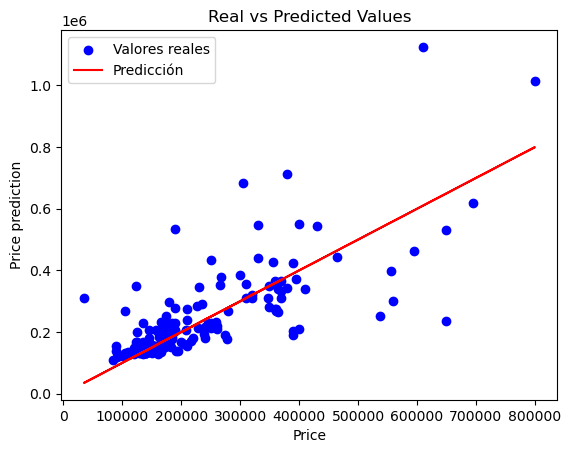

In [105]:
import matplotlib.pyplot as plt

# Realizar las predicciones con el modelo ajustado
predictions = model_forest_reg.predict(X_test)

# Graficar los valores reales como puntos
plt.scatter(y_test, predictions, color='blue', label='Valores reales')

# Graficar la función de predicción (línea de 45 grados, donde valores reales = valores predichos)
plt.plot(y_test, y_test, color='red', label='Predicción')

# Personalizar el gráfico
plt.xlabel('Price')
plt.ylabel('Price prediction')
plt.title('Real vs Predicted Values')
plt.legend()

# Mostrar el gráfico
plt.show()

Probamos con RandomizedSearchCV
-----------

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 140, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 30, num = 3)]
min_samples_split = [2, 3, 4, 5, 6]
min_samples_leaf = [1, 2, 3, 4, 5, 6]

params_grid = {
    'forest_reg__n_estimators': n_estimators,
    'forest_reg__max_features': max_features,
    'forest_reg__max_depth': max_depth,
    'forest_reg__min_samples_split': min_samples_split,
    'forest_reg__min_samples_leaf': min_samples_leaf
}

                                            

In [100]:
from sklearn.model_selection import RandomizedSearchCV

gridRandom_forest = RandomizedSearchCV(
    estimator = model_forest_reg,
    param_distributions = params_grid,
    n_iter = 5,
    cv = 10,
    random_state = 42,
    n_jobs = -1,
    verbose = 10
)

gridRandom_forest.fit(X,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['surface',
                                                                                'year '
                                                                                'built',
                                                                                'building '
                                                                                'reform',
                                                                                'garden',
                                                                                'lift',
                                                                                'rooms',
                                                                                'bathrooms']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['location',
                                                                                'air '
                                                                                'conditioning',
                                                                                'property...
                                              RandomForestRegressor(max_depth=18,
                                                                    n_estimators=30,
                                                                    random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'forest_reg__max_depth': [3, 16, 30],
                                        'forest_reg__max_features': ['auto',
                                                                     'sqrt'],
                                        'forest_reg__min_samples_leaf': [1, 2,
                                                                         3, 4,
                                                                         5, 6],
                                        'forest_reg__min_samples_split': [2, 3,
                                                                          4, 5,
                                                                          6],
                                        'forest_reg__n_estimators': [50, 60, 70,
                                                                     80, 90,
                                                                     100, 110,
                                                                     120, 130,
                                                                     140]},
                   random_state=42, verbose=10)

In [101]:
gridRandom_forest.best_params_

{'forest_reg__n_estimators': 90,
 'forest_reg__min_samples_split': 6,
 'forest_reg__min_samples_leaf': 2,
 'forest_reg__max_features': 'auto',
 'forest_reg__max_depth': 30}

In [102]:
#Ajusto el modelo con los nuevos parámetros
forest_reg_ii = RandomForestRegressor(
    random_state = 42,
    max_depth = 30,
    min_samples_split = 6,
    n_estimators = 90,
    min_samples_leaf = 2,
    max_features = 'auto'
)

#Defino el Pipeline: Transformación + modelo
model_forest_reg_ii = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('forest_reg', forest_reg_ii)
    ]
)

#Ajustar el modelo
model_forest_reg_ii.fit(X_train, y_train)

#Evaluación
#Calcular el score con la validación cruzada CV = 10
forest_reg_scores_ii = cross_val_score(
    model_forest_reg_ii,
    X,
    y,
    scoring = 'neg_mean_squared_error',
    cv = 10
)

#Realizar el cambio de signo y sacar la raíz
forest_rmse_scores_ii = np.sqrt(-forest_reg_scores_ii)

#Mostrar el resultado usando la función display_scores
display_scores(forest_rmse_scores_ii)

C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\rafacampa9\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value fo

Scores: [144789.28831395 185763.03035625 111670.08188713  74293.30750046
  92124.12344586  89212.8591965  154689.78058261 112513.58648812
  80480.4885637  151054.39645994]
Mean: 119659.09427945214
Standard Deviation: 35506.50532644948
